# INTERPOLATION
*Machine learning because the computer has to know how to predict the value of a function*
- parametric: I optimize the parameters of my model in order to interpolate
- non-parametric: there are possibly millions of parameters

## Nearest neighbours interpolation
*The most simple example of interpolation*

## Linear interpolation
*Straight line between (discrete) points, and the values of the slope and of the intercept vary from point to point*

If there are two points where the first derivative of the function phi is zero, there must be a point in between them where the second derivative is zero -> the error that I make when I interpolate the function g is proportional to the second derivative of the function f and to the square of the interval (so it depends on the sampling).

## Spline interpolation
*In every interval/bin I use cubic functions, moreover I have to impose 4n conditions*
- The error is proportional to the fourth derivative of the function
- It does not suffer from interpolation in the edges

**The previous methods can be extended to many dimensions ->**

## Multi-dimensional interpolation
*non-parametric methods*

# NEURAL NETWORKS
**Linear combination** of my pieces of information / my parameters (ex. values of z,OmegaM,OmegaR) to obtain an activation function -> the **Loss Function** evaluates the error that the process is making (/it measures the difference between the network's predictions and the actual target values)
- Dc(z,OmegaM,OmegaR,w_0,w_a,H0,...)
- P(k,...) power spectrum

In [73]:
import sys
sys.path.append("../../")

import numpy as np
import math as m
import matplotlib.pyplot as plt
from pyACC.cosmology import Dc
from scipy.interpolate import interp1d
from scipy.misc import derivative

In [74]:
#redshift
d=0.1
z=np.arange(0,2+d,d)

#comoving distance
def hubble_function(z,OmegaM,OmegaR,w,H0):
    return H0*m.sqrt(OmegaM*(1+z)**3+OmegaR*(1+z)**4+(1-OmegaM-OmegaR)*(1+z)**(3*(1+w)))
OmegaM=0.319
OmegaR=0
w=-1
H0=67
Dc_z=[]
for i in range(0,len(z)):
    Dc_z.append(Dc(hubble_function,z[i],OmegaM,OmegaR,w,H0))

In [75]:
#interpolation
interpolate=interp1d(z,Dc_z,kind='linear')

d_int=0.01
z_int=np.arange(0,2+d_int,d_int)
Dc_int=interpolate(z_int)

## Residual
$\Delta D_c=D_c^{int}-D_c^t$

In [76]:
#theoretical comoving distance in z_int
Dc_t=[]
for i in range(0,len(z_int)):
    Dc_t.append(Dc(hubble_function,z_int[i],OmegaM,OmegaR,w,H0))

In [77]:
DeltaD=[]
for i in range(0,len(z_int)):
    DeltaD.append(Dc_t[i]-Dc_int[i])
    #print(DeltaD[i])
'''
for i,Dc_val in enumerate(Dc_z):
    j=int(i*d/d_int) #so that I can compute the difference between Dc_z and Dc_int, which have different lenghts
    DeltaD.append(Dc_val-Dc_int[j])
    print(DeltaD[i])
'''

'\nfor i,Dc_val in enumerate(Dc_z):\n    j=int(i*d/d_int) #so that I can compute the difference between Dc_z and Dc_int, which have different lenghts\n    DeltaD.append(Dc_val-Dc_int[j])\n    print(DeltaD[i])\n'

In [78]:
#second derivative
der_Dc=[]
for i in range(0,len(z_int)):
    #comoving distance function
    def Dc_func(z):
        z=max(z,1e-6)
        return Dc(hubble_function,z,OmegaM,OmegaR,w,H0)
    der_Dc.append(abs(derivative(Dc_func,z_int[i],dx=1e-6,n=2)))
der_Dc_mod=[]
for i in range(0,len(z_int)):
    der_Dc_mod.append(abs(der_Dc[i])*0.01/8)

/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_6811/3790085216.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  der_Dc.append(abs(derivative(Dc_func,z_int[i],dx=1e-6,n=2)))


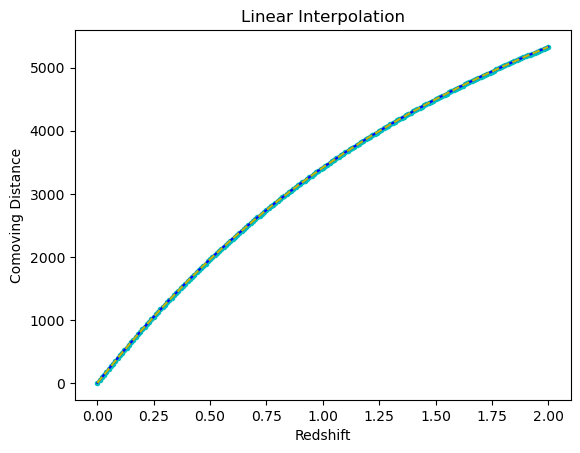

In [79]:
#plot
plt.plot(z_int,Dc_int,color='c',marker='.')
plt.plot(z,Dc_z,color='b',marker=',') #or simply plt.plot(z,Dc_z,'bd')
plt.plot(z,interpolate(z),color='y',linestyle='--')
plt.xlabel('Redshift')
plt.ylabel('Comoving Distance')
plt.title('Linear Interpolation')
plt.show()

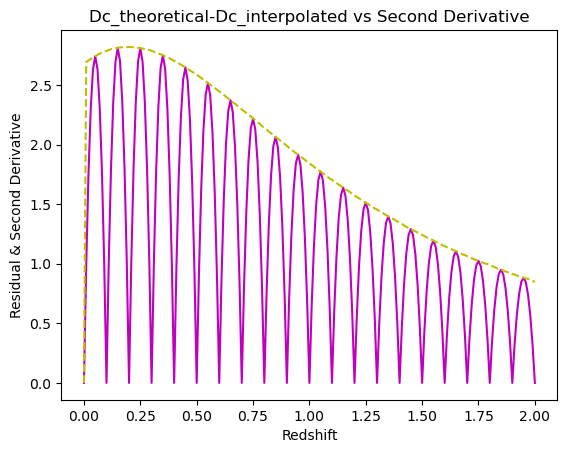

In [80]:
plt.plot(z_int,DeltaD,color='m',linestyle='-')
plt.plot(z_int,der_Dc_mod,color='y',linestyle='--')
plt.xlabel('Redshift')
plt.ylabel('Residual & Second Derivative')
plt.title('Dc_theoretical-Dc_interpolated vs Second Derivative')
plt.show()